* [Analyse univariée](#au)
* [Analyse bivariée](#ab)
* [Analyse multivariée (PCA,ANOVA)](#am)

In [120]:
#!pip install researchpy

In [121]:
 #!pip install pingouin


In [8]:
#!pip install mlxtend 

     ---------------------------------------- 1.3/1.3 MB 7.1 MB/s eta 0:00:00


In [1]:
import pandas as pd #(Vaex – Faster Pandas Alternate in Python)
import numpy as np
from hurry.filesize import size
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn')
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pingouin as pg
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from sklearn.decomposition import PCA

import scipy.stats as stats
from mlxtend.plotting import plot_pca_correlation_graph
from functions2 import*

from sklearn import preprocessing 
from sklearn import decomposition
from functions import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data_exploration.csv',sep='\t')

<AxesSubplot:>

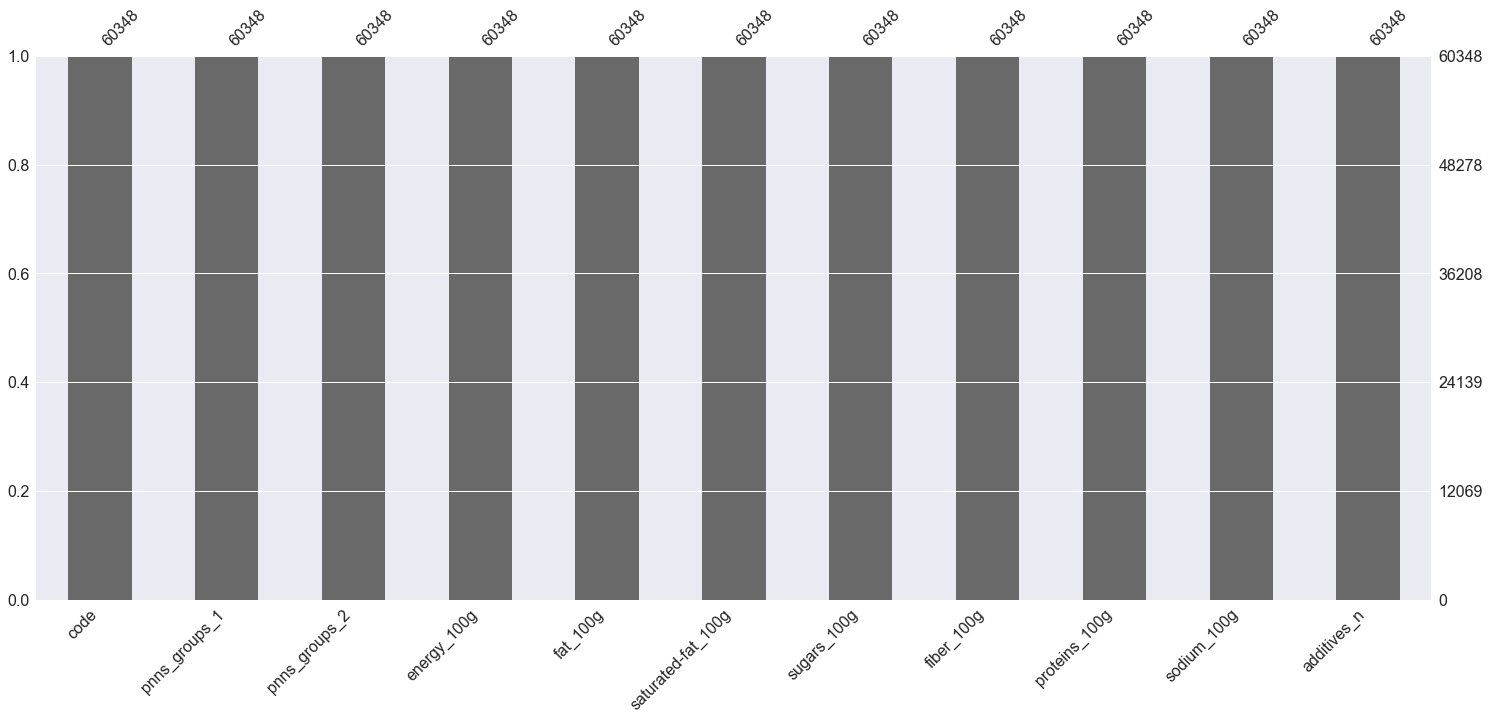

In [5]:
msno.bar(df)

# Analyse univariée <a class="anchor" id="au"></a>
## Données catégorielles

In [5]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,additives_n
count,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000
mean,1028.070213,12.468236,4.718871,10.699272,1.864137,7.429972,0.286530,1.246657
std,606.468864,12.376869,4.802869,11.587205,1.007920,5.247110,0.216727,2.260489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,629.000000,3.700000,1.200000,2.600000,1.864137,4.700000,0.149606,0.000000
50%,1012.196908,12.225747,4.636180,10.699272,1.864137,7.334751,0.283744,0.000000
75%,1149.000000,12.225747,4.636180,10.699272,1.864137,7.334751,0.311024,2.000000
max,4571.817739,100.000000,31.000000,86.000000,7.900000,37.000000,1.732283,31.000000


In [127]:
# add a column contains_additives.It takes 0 if additives_n=1 else it takes 1

In [6]:
df["contains_additives"]=pd.Series(np.where(df.additives_n>0,1,0)).astype(int)

In [7]:
#Let's take a look at what part of the products actually contain additives. I'm going to apply grouping on the contains_additives column and change the index names for clarity.
#There should be only two classes here.
products_with_additives=df["contains_additives"].groupby(df["contains_additives"]).count()
products_with_additives

contains_additives
0    37082
1    23188
Name: contains_additives, dtype: int64

In [10]:

products_with_additives.index=["don't contain additives","contain additives"]
#assert_equal(len(products_with_additives),2)

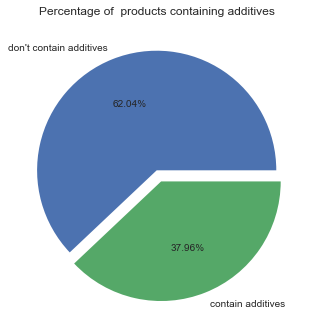

In [132]:
plot_pie_on_grouped_data(products_with_additives,"Percentage of  products containing additives",(0,0.1))

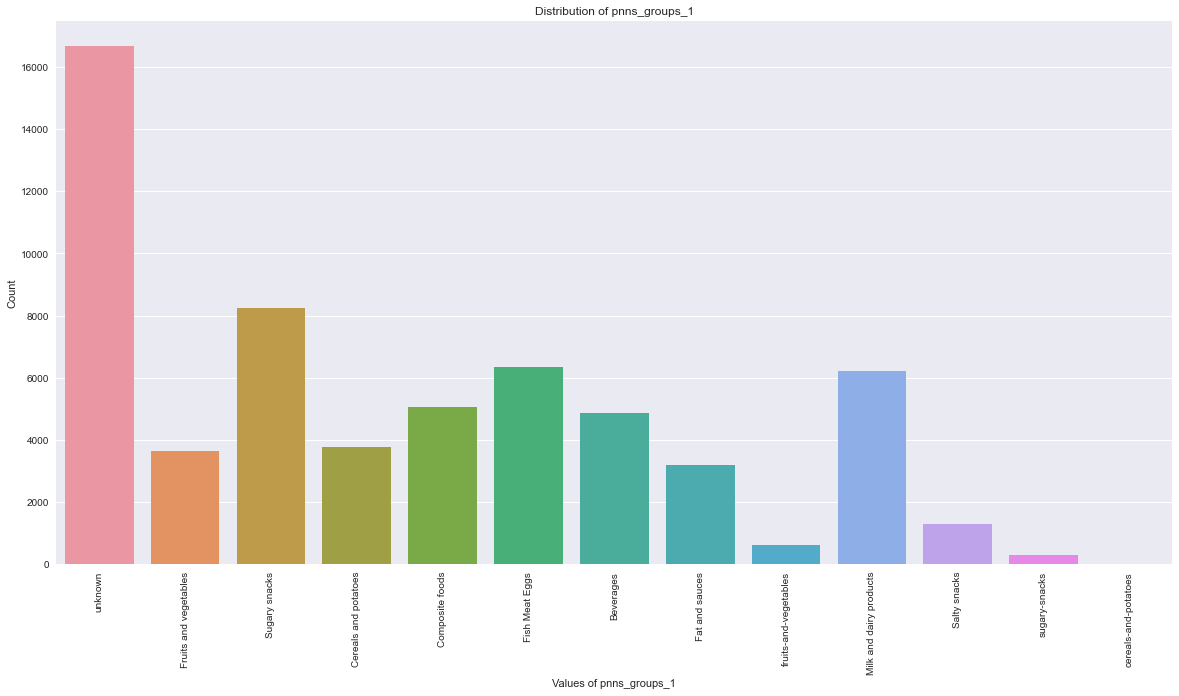

In [140]:
plot_countplot_categoriel_feature(df,'pnns_groups_1',20,10)

## Données numériques

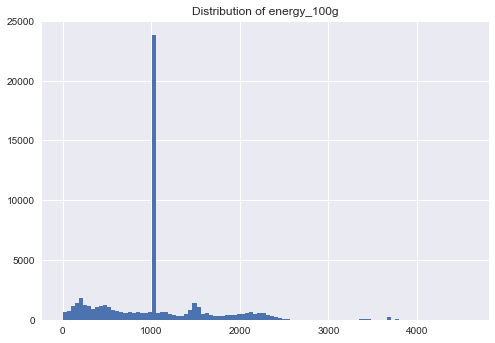

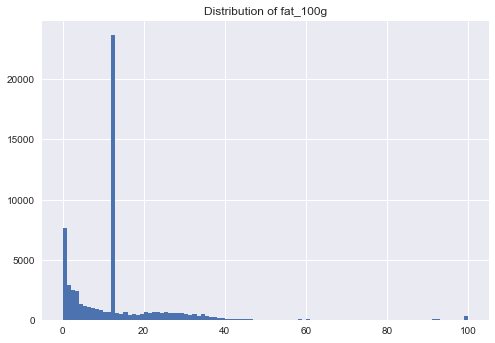

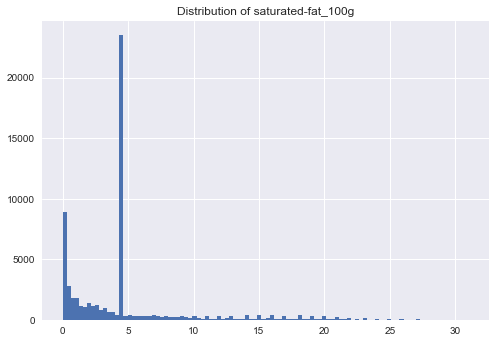

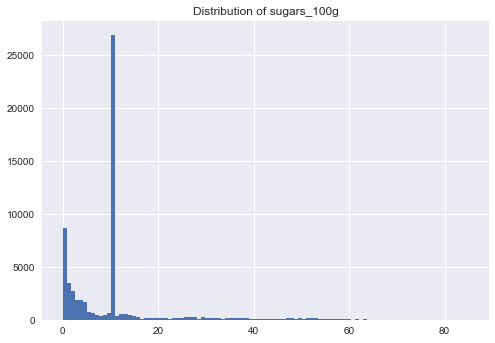

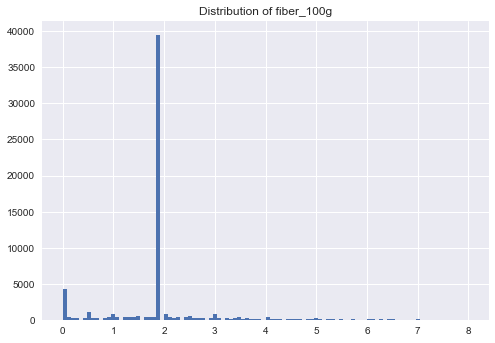

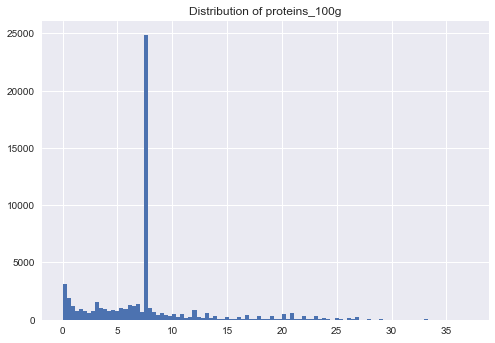

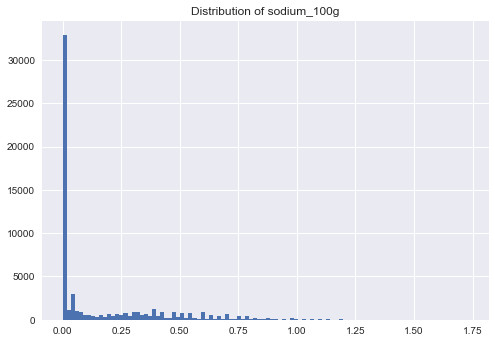

In [8]:
#
numeric_features_100g=['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g']
#plot_histogram_numerical_feature(df,'energy_100g',100)
for nf in numeric_features_100g:
    plot_histogram_numerical_feature(df,nf,100)

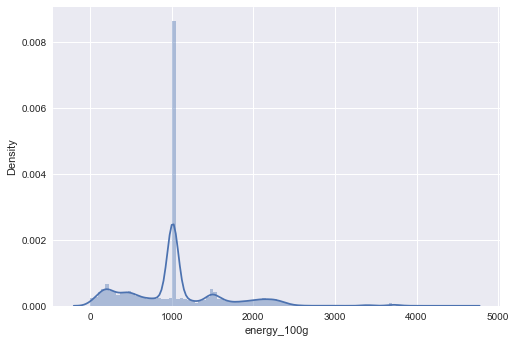

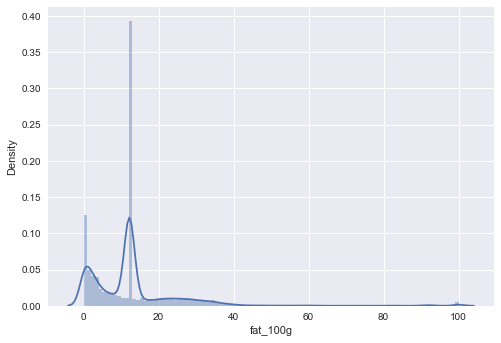

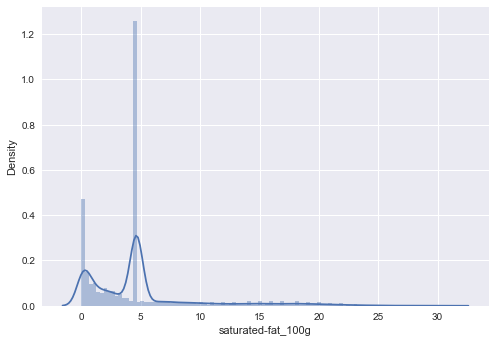

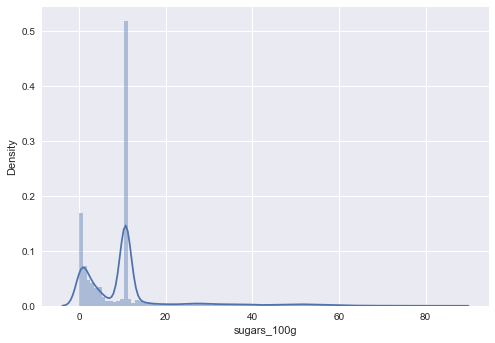

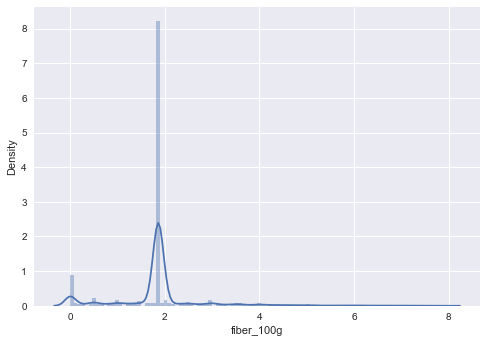

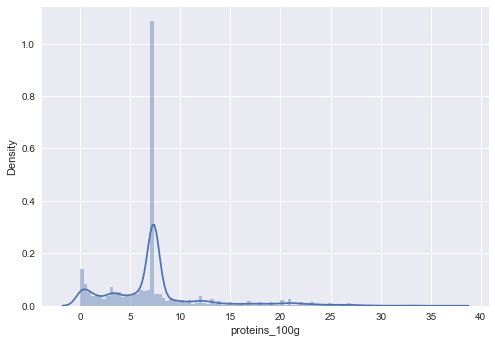

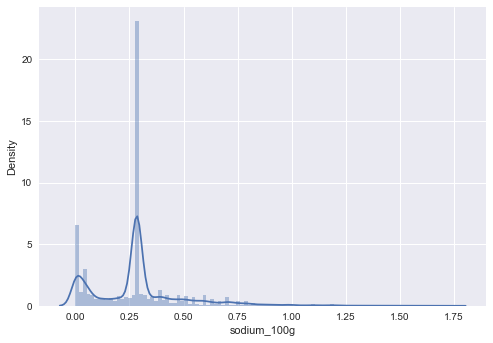

In [16]:

#plot_histogram_numerical_feature(df,'energy_100g',100)
for nf in numeric_features_100g:
    plot_second_histogram_numerical_feature(df,nf,100)

# Analyse bivariée <a class="anchor" id="ab"></a>

## Numérique et numérique

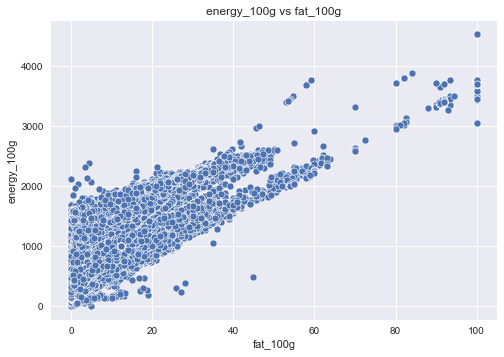

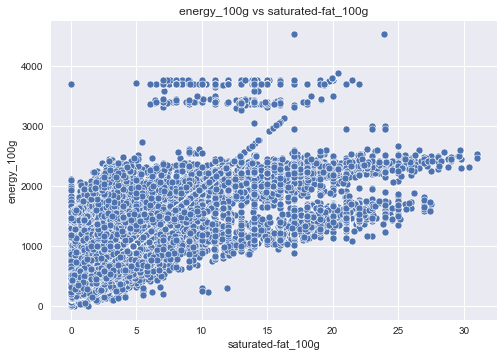

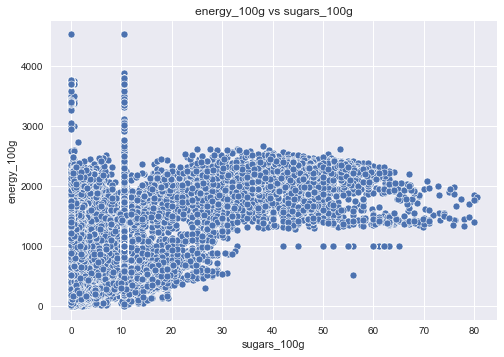

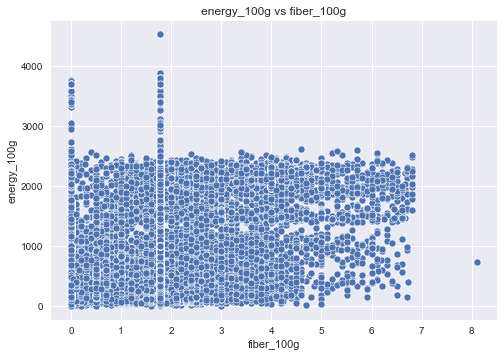

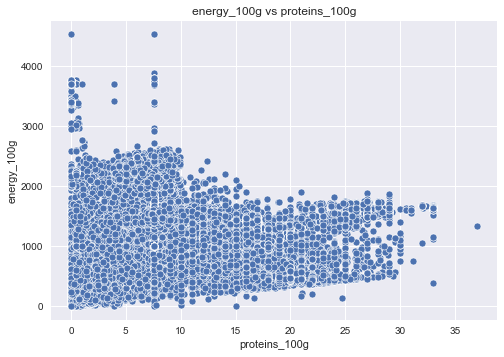

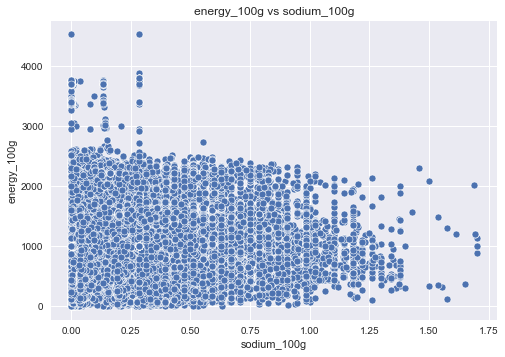

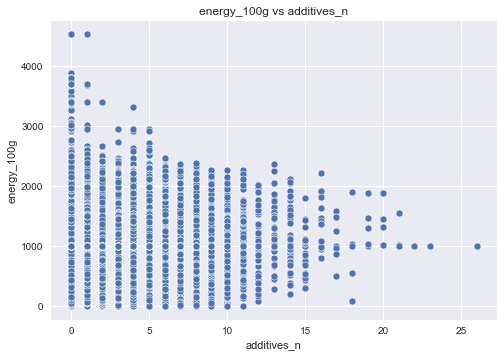

In [139]:
#Nuage de points
#['energy_100g', 'fat_100g','saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g', 'fruits-vegetables-nuts_100g', 'additives_n']
#pd.crosstab(df['energy_100g'], df['sugars_100g'])
ing_to_test_with_energy=['fat_100g','saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g', 'additives_n']
for ing in ing_to_test_with_energy:
    title='energy_100g vs '+ing
    plt.title(title)
    sns.scatterplot( df[ing],df['energy_100g'])#bivarié
#sns.scatterplot(df['fat_100g'], df['saturated-fat_100g'],hue=df['energy_100g'])#multivarié
    plt.show()

## Numérique et catégoriel

In [141]:
additives_by_pnss_group1=df["additives_n"].groupby(df["pnns_groups_1"])
additives_by_pnss_group1

In [142]:
num_products_by_pnss_group1=df.pnns_groups_1.groupby(df.pnns_groups_1).count().sort_values(ascending=False).nlargest(10)

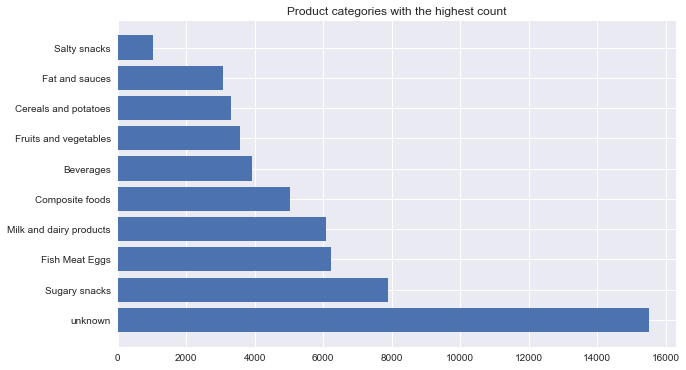

In [144]:
plot_barh_on_grouped_data(num_products_by_pnss_group1,"Pnss group 1 product with the highest count of additives","",(10,6))

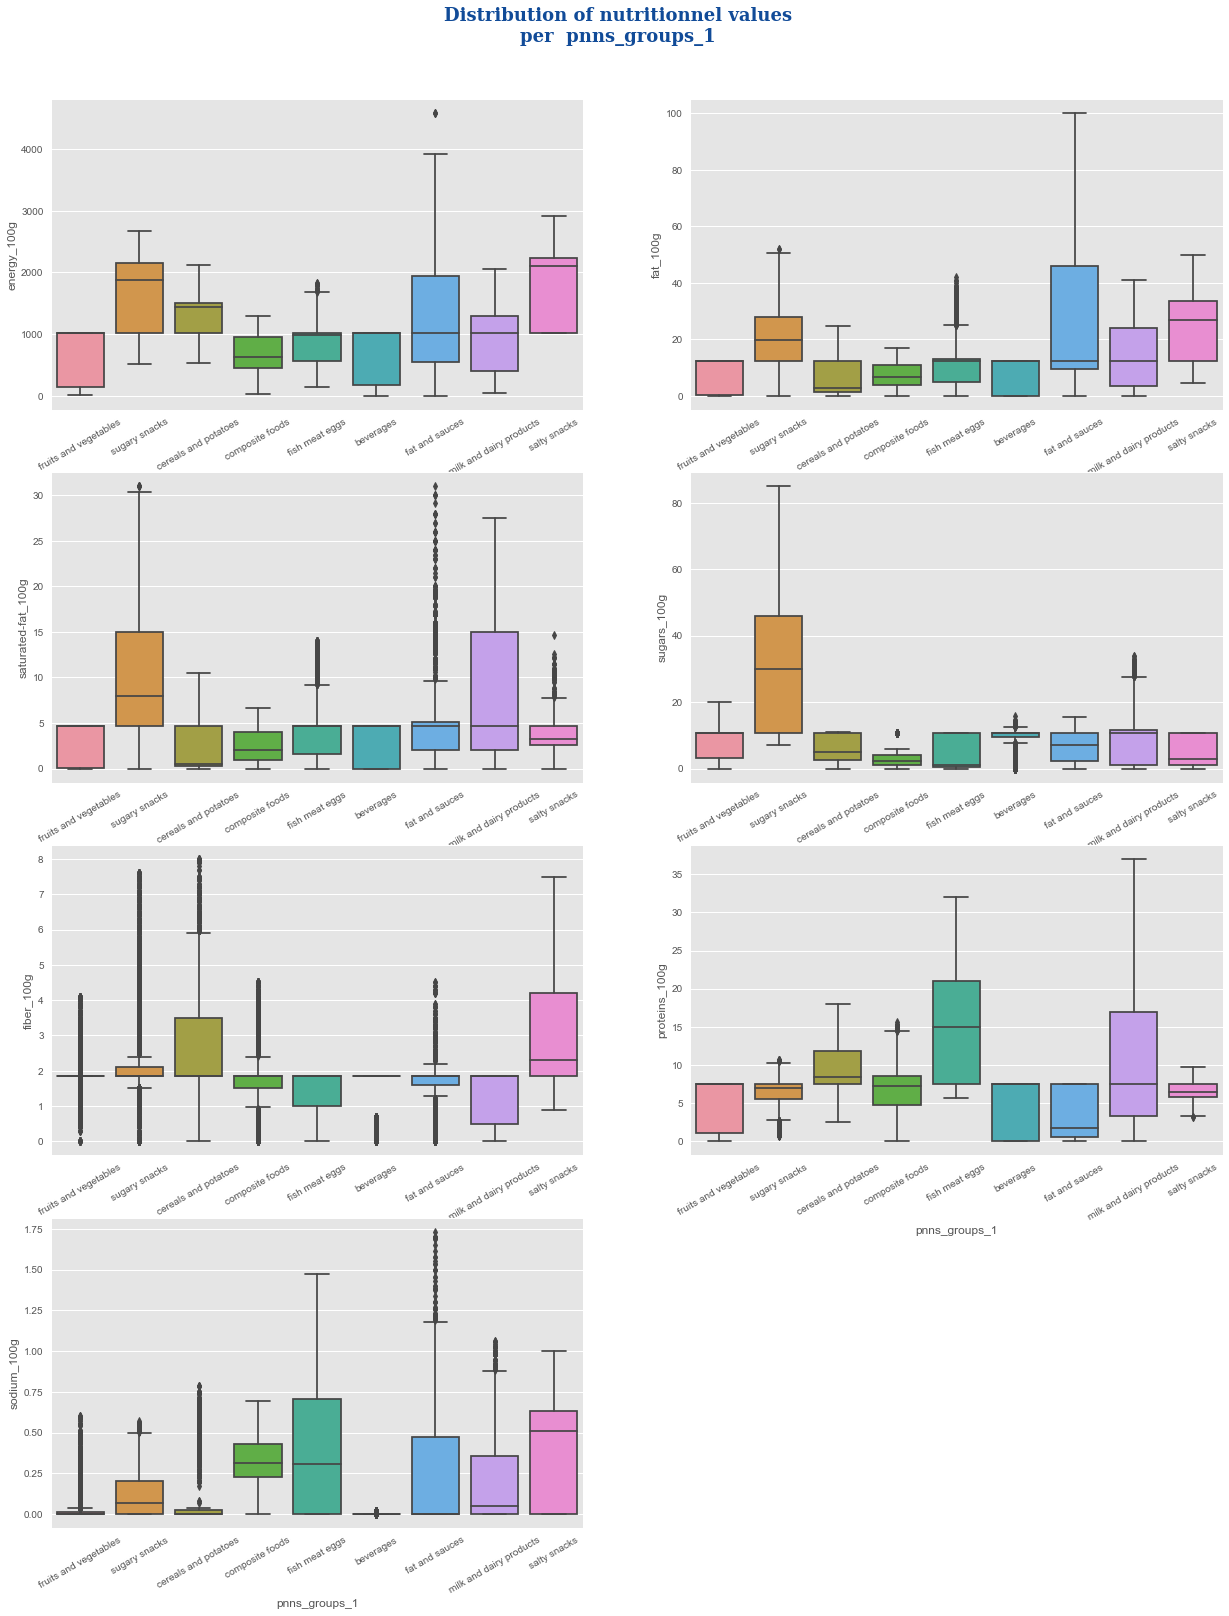

In [14]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sub = 0
for i in range(len(numeric_features_100g)):
    fig.add_subplot(6,2,i+1)
    colonne = numeric_features_100g[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=df[df["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution of nutritionnel values" "\n" "per  pnns_groups_1", ha="center", 
         fontdict=font_title)
plt.show()
fig.savefig('distribution_box.png', format="png")

# Analyse multivariée (PCA, ANOVA) <a class="anchor" id="am"></a>

In [21]:
list_pnss_group1=df["pnns_groups_1"].unique().tolist()
list_pnss_group2=df["pnns_groups_2"].unique().tolist()

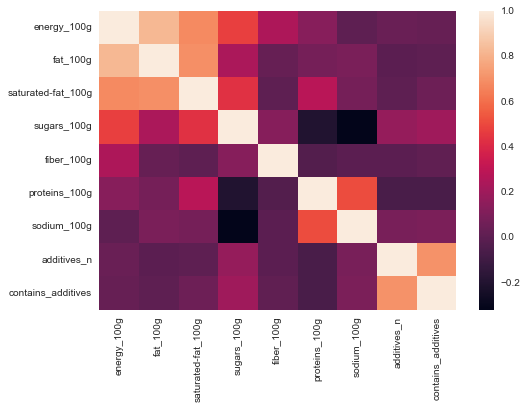

In [148]:
#look for correlated variables
sns.heatmap(df.corr());

In [11]:
X=df[numeric_features_100g].values

In [12]:
type(X)

numpy.ndarray

In [5]:
# choix du nombre de composantes à calculer
n_comp = 3

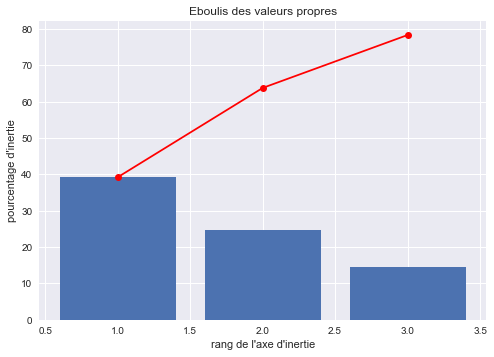

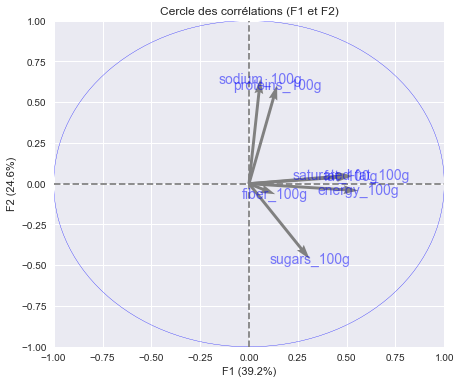

In [126]:

# Centrage et Réduction

X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)],labels = np.array(numeric_features_100g))







In [127]:
data=df[numeric_features_100g]
pd.DataFrame(X_scaled,columns=data.columns,index=data.index)

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,-0.026174,-0.019592,-0.017217,-1.533046e-16,0.000000,-0.018147,-0.012859
1,-0.026174,-0.019592,-0.017217,-1.533046e-16,0.000000,-0.018147,-0.012859
2,0.746837,-0.670469,0.496158,-1.533046e-16,4.301830,-0.224882,-0.118268
3,0.217539,-0.917706,-0.913185,-8.275811e-01,0.353070,0.489803,1.446393
4,-0.026174,-0.019592,-0.017217,-1.533046e-16,0.000000,-0.018147,-0.012859
...,...,...,...,...,...,...,...
60265,-0.842705,-0.975072,-0.940877,-9.147469e-01,-0.559709,-0.863334,-1.302897
60266,-0.966373,-0.942753,-0.961698,-6.299476e-01,0.531657,-0.844276,-1.322092
60267,-1.149401,-0.902355,-0.920056,-4.487117e-01,1.424593,-0.863334,-1.303636
60268,-0.804780,-0.983151,-0.961698,-9.233772e-01,-1.452644,-0.901451,-1.303926


In [35]:
X_projected = pca.transform(X_scaled)
pd.DataFrame(X_projected,index=data.index,columns=["F"+str(i+1) for i in range(3)])


,F1,F2,F3
0,-0.037287,-0.019886,0.002300
1,-0.037287,-0.019886,0.002300
2,0.862840,-0.522980,4.148276
3,-0.891866,1.484938,0.873114
4,-0.037287,-0.019886,0.002300
...,...,...,...
60265,-2.034133,-0.956852,-0.428768
60266,-1.860853,-1.153585,0.594061
60267,-1.745899,-1.282466,1.411625
60268,-2.156070,-0.922300,-1.269524


In [ ]:
f1=pcs[0]
sorted_f1 = sorted(f1, key = float)
print(f1)
#print('f1 is a linear combinaison of ',numeric_features_100g)
ch='F1='
for cp in range(0,len(sorted_f1)):
    ch=ch+str(sorted_f1[cp])+'*'+str(numeric_features_100g[cp])+'\n  +'
ch = ch.rstrip(ch[-1])  
print(ch)


In [114]:
def equation_pca(f,name):
    #f1=pcs[0]
    sorted_f = sorted(f, key = float)
    #print(f)
    #print('f1 is a linear combinaison of ',numeric_features_100g)
    ch=name+'='
    s=''
    for cp in range(0,len(sorted_f)):       
            ch=ch+str(sorted_f[cp])+'*'+str(numeric_features_100g[cp])+'\n   '
        
    #ch = ch.rstrip(ch[-1])  
    print(ch)

In [115]:
f1=pcs[0]
equation_pca(f1,'F1')

F1=0.058420385004282094*energy_100g
   0.13416890692154493*fat_100g
   0.14379875157881805*saturated-fat_100g
   0.310076804405165*sugars_100g
   0.5226576966622482*fiber_100g
   0.5251562205809913*proteins_100g
   0.5592851987586354*sodium_100g
   


**Note**
<br>
The first PCA component is the most important one.We can notice from this linear combinaison that the sodium is the most important variable then the proteins ans fiber
<br>
Let's take a close look at these variables



In [124]:
df[['fiber_100g','proteins_100g','sodium_100g']].head(10)

,fiber_100g,proteins_100g,sodium_100g
0,1.864137,7.334751,0.283744
1,1.864137,7.334751,0.283744
2,6.200000,6.250000,0.260899
3,2.220000,10.000000,0.600000
4,1.864137,7.334751,0.283744
5,1.864137,7.334751,0.283744
6,1.864137,7.334751,0.283744
7,1.864137,7.334751,0.283744
8,3.600000,7.140000,0.375000
9,1.864137,7.334751,0.283744


In [125]:
f2=pcs[1]
equation_pca(f2,'F2')

F2=-0.46156877084923054*energy_100g
   -0.06416568704039663*fat_100g
   -0.04220107002204688*saturated-fat_100g
   0.0446847851789371*sugars_100g
   0.052755234435001276*fiber_100g
   0.6036118224907675*proteins_100g
   0.6418169731589796*sodium_100g
   


In [117]:
f3=pcs[2]
equation_pca(f3,'F3')

F3=-0.21617054856437917*energy_100g
   -0.15100864566828265*fat_100g
   -0.0028400044482491506*saturated-fat_100g
   0.010061375305629266*sugars_100g
   0.10207926051475884*fiber_100g
   0.11864217187625552*proteins_100g
   0.9517674325137127*sodium_100g
   


### PCA

In [123]:
df[['proteins_100g']].max()

proteins_100g    37.0
dtype: float64

In [152]:
X_pca

array([[-1.46822950e+01,  7.84612594e-02,  6.92359976e-02,
        -2.08201540e-02],
       [-1.46822950e+01,  7.84612594e-02,  6.92359976e-02,
        -2.08201540e-02],
       [ 4.57237381e+02,  1.55113275e+00, -1.54241021e+01,
        -3.76580310e+00],
       ...,
       [-5.81718915e+02, -5.09470152e-01, -1.60371115e+00,
        -4.68601308e+00],
       [-1.46822950e+01,  7.84612594e-02,  6.92359976e-02,
        -2.08201540e-02],
       [-2.87743605e+02,  2.05228833e-01, -6.01760450e+00,
        -6.24603206e+00]])

In [153]:
pca.explained_variance_ratio_#tell how do  a column capture the useful information

array([9.99455681e-01, 3.07201986e-04, 1.30022686e-04, 7.29594540e-05])

In [154]:
pca.n_components_

4


### ANOVA


<AxesSubplot:title={'center':'energy_100g'}, xlabel='pnns_groups_2'>

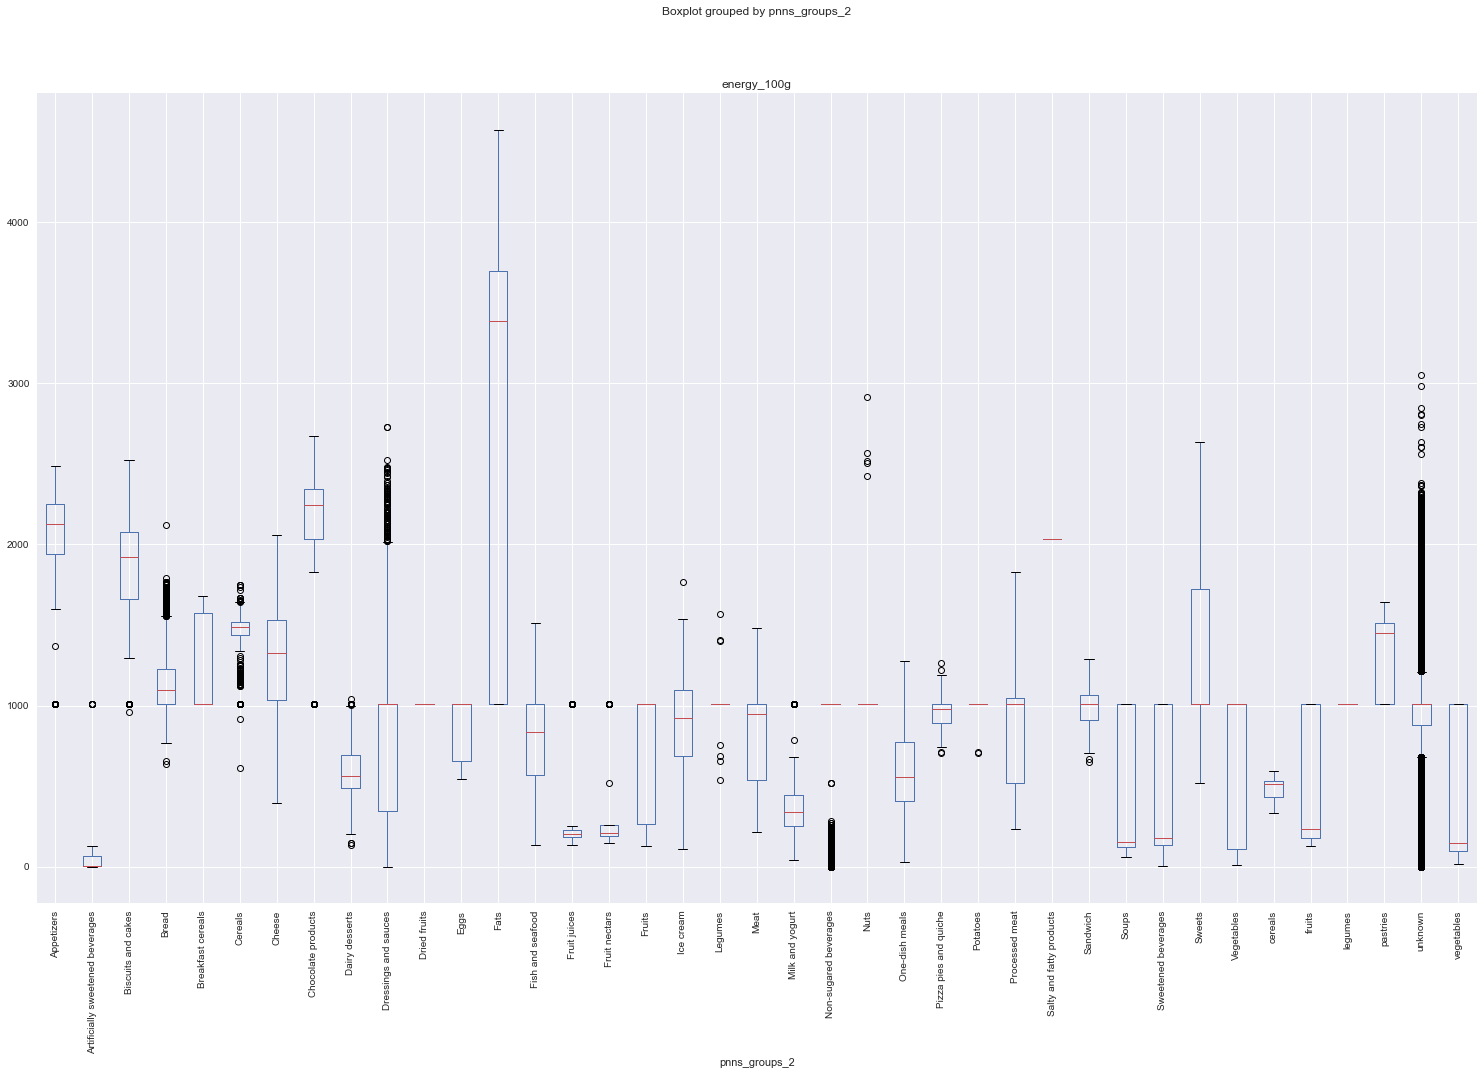

In [28]:
#Create a boxplot
df.boxplot('energy_100g', by='pnns_groups_2', figsize=(25, 15),rot=90)

In [30]:
#ONE-WAY ANOVA USING SCIPY.STATS
#tests if h0:the mean of an ingredient is equal between 2 or more groups of pnns_groups_2 
F,pvalue=stats.f_oneway(df[df['pnns_groups_2']==list_pnss_group2[1]]['energy_100g'],
               df[df['pnns_groups_2']==list_pnss_group2[2]]['energy_100g'],
               df[df['pnns_groups_2']==list_pnss_group2[3]]['energy_100g'])


F_onewayResult(statistic=26.450309007717248, pvalue=3.956512666201412e-12)

**NOTE** 

<br>
pvalues are numbers between 0 and 1 thant quantify how confident a one group is different from other
<br>
The ratio F=varaince between groups/variance withing groups.
<br>
The larger the F,the more likely it is that groups have different means(rejct H0)

Here the  pvalue <5% this rejects the null hypothesis of equality of means of energy_100g  between at least 2 of the mentioned 3 groups of pnns_groups_2
Which the case when lookin to the boxplot

In [31]:
#rp.summary_cont(df['energy_100g'].groupby(df['pnns_groups_2']))